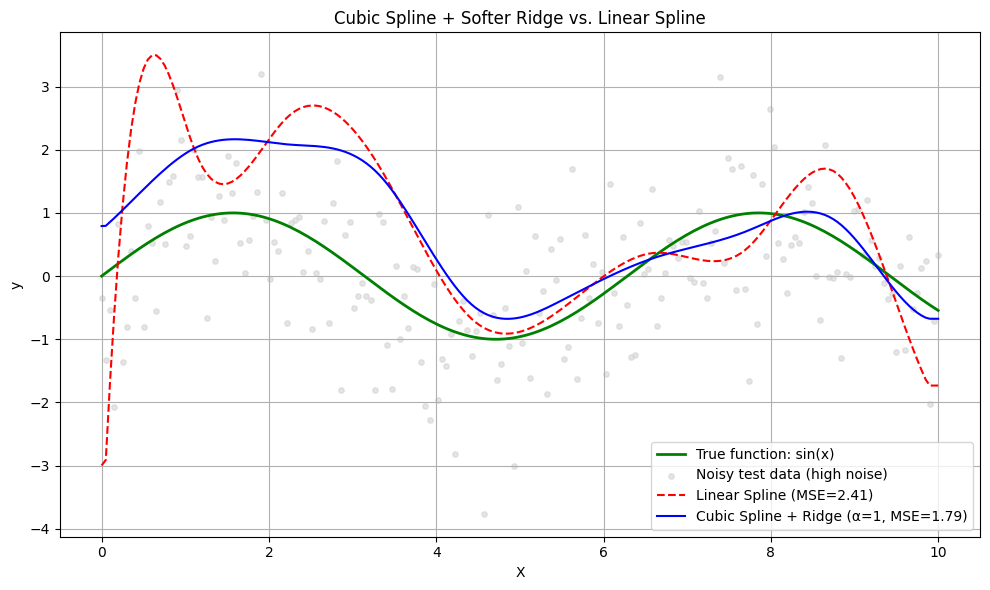

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Step 1: Generate training data
np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
y_true = np.sin(X).ravel()
y_heavy_noise = y_true + np.random.normal(scale=3, size=n_samples)  # High noise

# Step 2: Generate test data
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_test_true = np.sin(X_test).ravel()
y_test_noisy_heavy = y_test_true + np.random.normal(scale=1.0, size=X_test.shape[0])

# Step 3: Define and fit models
# Linear spline without regularization
spline_linear_no_ridge = make_pipeline(
    SplineTransformer(n_knots=10, degree=3, include_bias=False),
    Ridge(alpha=0)
)
spline_linear_no_ridge.fit(X, y_heavy_noise)
y_pred_linear_no_ridge = spline_linear_no_ridge.predict(X_test)

# Cubic spline with soft Ridge regularization
spline_cubic_with_ridge_soft = make_pipeline(
    SplineTransformer(n_knots=10, degree=3, include_bias=False),
    Ridge(alpha=1)  # smaller penalty
)
spline_cubic_with_ridge_soft.fit(X, y_heavy_noise)
y_pred_cubic_with_ridge_soft = spline_cubic_with_ridge_soft.predict(X_test)

# Step 4: Calculate MSEs
mse_linear_no_ridge = mean_squared_error(y_test_noisy_heavy, y_pred_linear_no_ridge)
mse_cubic_with_ridge_soft = mean_squared_error(y_test_noisy_heavy, y_pred_cubic_with_ridge_soft)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true, label="True function: sin(x)", color="green", linewidth=2)
plt.scatter(X_test, y_test_noisy_heavy, color="lightgray", s=15, label="Noisy test data (high noise)", alpha=0.6)
plt.plot(X_test, y_pred_linear_no_ridge, label=f"Linear Spline (MSE={mse_linear_no_ridge:.2f})", color="red", linestyle="--")
plt.plot(X_test, y_pred_cubic_with_ridge_soft, label=f"Cubic Spline + Ridge (α=1, MSE={mse_cubic_with_ridge_soft:.2f})", color="blue")
plt.title("Cubic Spline + Softer Ridge vs. Linear Spline")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

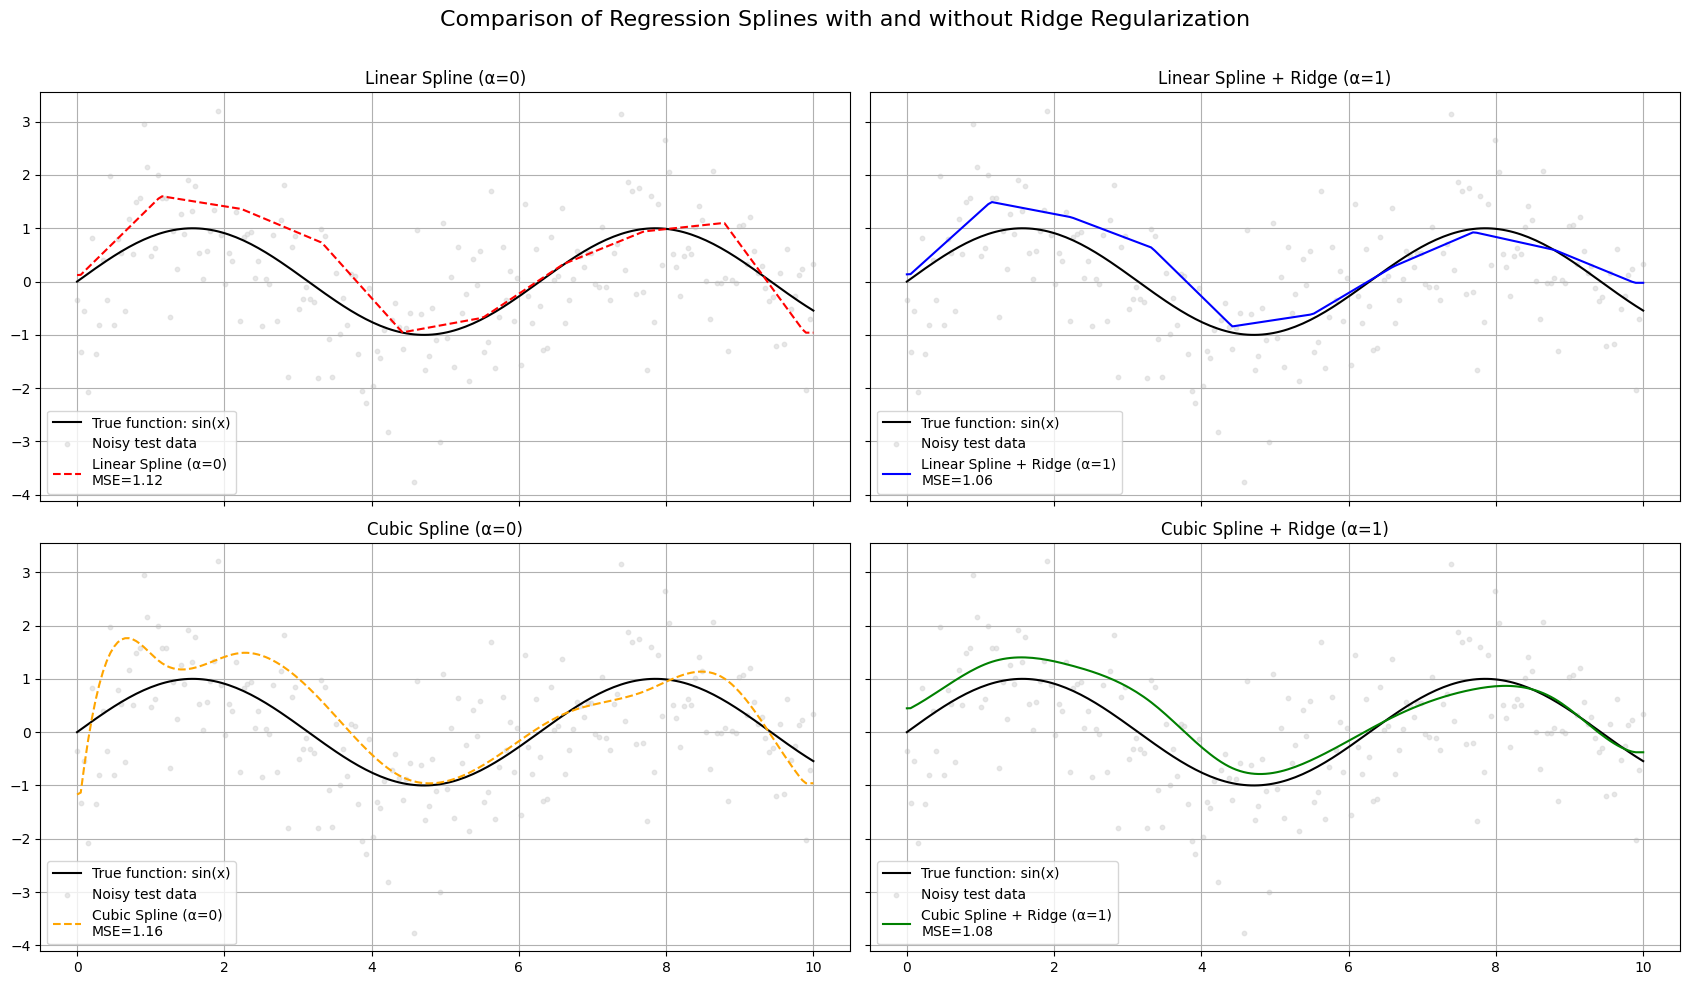

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Step 1: Generate noisy training data
np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
y_true = np.sin(X).ravel()
y_heavy_noise = y_true + np.random.normal(scale=1.2, size=n_samples)  # Heavy noise

# Step 2: Generate noisy test data
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_test_true = np.sin(X_test).ravel()
y_test_noisy_heavy = y_test_true + np.random.normal(scale=1.0, size=X_test.shape[0])

# Step 3: Define model configs for the 4 subplots
configs = [
    {"degree": 1, "alpha": 0, "label": "Linear Spline (α=0)", "color": "red", "linestyle": "--"},
    {"degree": 1, "alpha": 1, "label": "Linear Spline + Ridge (α=1)", "color": "blue", "linestyle": "-"},
    {"degree": 3, "alpha": 0, "label": "Cubic Spline (α=0)", "color": "orange", "linestyle": "--"},
    {"degree": 3, "alpha": 1, "label": "Cubic Spline + Ridge (α=1)", "color": "green", "linestyle": "-"},
]

# Step 4: Set up the 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(17, 10), sharex=True, sharey=True)
axes = axes.ravel()

# Step 5: Loop through and plot each model
for i, (cfg, ax) in enumerate(zip(configs, axes)):
    model = make_pipeline(
        SplineTransformer(n_knots=10, degree=cfg["degree"], include_bias=False),
        Ridge(alpha=cfg["alpha"])
    )
    model.fit(X, y_heavy_noise)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_noisy_heavy, y_pred)

    # Plotting each subplot
    ax.plot(X_test, y_test_true, color="black", label="True function: sin(x)")
    ax.scatter(X_test, y_test_noisy_heavy, color="lightgray", s=10, label="Noisy test data", alpha=0.5)
    ax.plot(X_test, y_pred, label=f"{cfg['label']}\nMSE={mse:.2f}", color=cfg["color"], linestyle=cfg["linestyle"])
    ax.set_title(cfg["label"], fontsize=12)
    ax.legend()
    ax.grid(True)

# Overall title and layout
fig.suptitle("Comparison of Regression Splines with and without Ridge Regularization", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_242/2499884881.py:20: RuntimeWarning: divide by zero encountered in log
  y_test_true_prob = expit((np.sin(X_test) + np.log(X_test)).ravel())


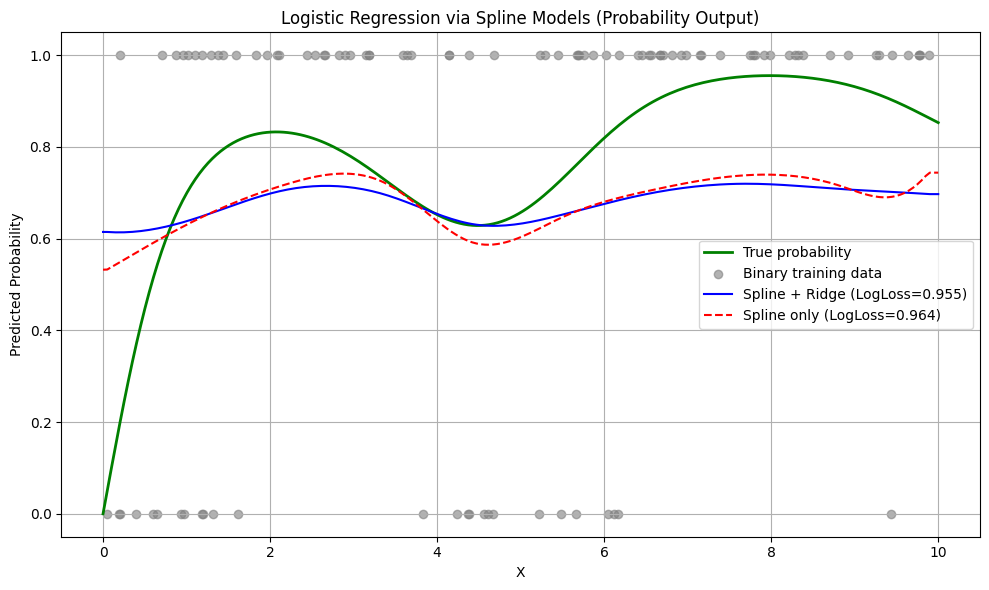

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
from scipy.special import expit

# Generate binary classification data
np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
# y_prob = expit(np.sin(X).ravel())
y_prob = expit((np.sin(X) + np.log(X)).ravel())
y_binary = np.random.binomial(1, y_prob)

# Generate test data and true probability
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
# y_test_true_prob = expit(np.sin(X_test).ravel())
y_test_true_prob = expit((np.sin(X_test) + np.log(X_test)).ravel())

y_test_labels = np.random.binomial(1, 0.1 * y_test_true_prob + np.random.normal(loc = 0.2, scale=0.1, size=len(y_test_true_prob)))

# Model 1: Spline + Ridge
model_ridge = make_pipeline(
    SplineTransformer(n_knots=10, degree=3, include_bias=False),
    Ridge(alpha=3)
)
model_ridge.fit(X, y_binary)
log_odds_pred_ridge = model_ridge.predict(X_test)
y_pred_prob_ridge = expit(log_odds_pred_ridge)
logloss_ridge = log_loss(y_test_labels, y_pred_prob_ridge)

# Model 2: Spline only (LinearRegression)
model_linear = make_pipeline(
    SplineTransformer(n_knots=10, degree=3, include_bias=False),
    LinearRegression()
)
model_linear.fit(X, y_binary)
log_odds_pred_linear = model_linear.predict(X_test)
y_pred_prob_linear = expit(log_odds_pred_linear)
logloss_linear = log_loss(y_test_labels, y_pred_prob_linear)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true_prob, label="True probability", color="green", linewidth=2)
plt.scatter(X, y_binary, label="Binary training data", color="gray", alpha=0.6)
plt.plot(X_test, y_pred_prob_ridge, label=f"Spline + Ridge (LogLoss={logloss_ridge:.3f})", color="blue")
plt.plot(X_test, y_pred_prob_linear, label=f"Spline only (LogLoss={logloss_linear:.3f})", color="red", linestyle="--")
plt.title("Logistic Regression via Spline Models (Probability Output)")
plt.xlabel("X")
plt.ylabel("Predicted Probability")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()